In [17]:
from math import acos, atan, cos, pi, sqrt, sin, log
from orbit2d import get_2dtrajectory, plot_2dtraj
from matplotlib import pyplot as plt
from scipy.integrate import quad
import numpy as np

In [18]:
d0, b, v0 = 1.e12, 6e3, 200
k = 1.32712e11

In [19]:
# d0, b, v0 = 1.e8, 10, 1.
# k = 1.

In [20]:
(thetai, thetaf), rs, ts = get_2dtrajectory(d0, b, v0, k)

(-50.0, 50.0, -25.0, 25.0)

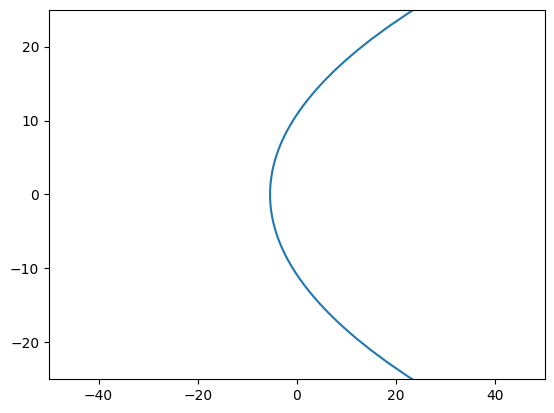

In [21]:
plot_2dtraj(d0, b, v0, k)
plt.axis([-50,50,-25,25])

In [22]:
thetas = np.linspace(thetai, thetaf, 100)
rs(thetas)

array([1.00000193e+12, 5.10461244e+03, 1.31287370e+03, 5.89941164e+02,
       3.34187033e+02, 2.15135818e+02, 1.50238249e+02, 1.11014095e+02,
       8.55133591e+01, 6.80090155e+01, 5.54775160e+01, 4.62002958e+01,
       3.91419106e+01, 3.36483247e+01, 2.92899507e+01, 2.57751890e+01,
       2.29004690e+01, 2.05201870e+01, 1.85279742e+01, 1.68446647e+01,
       1.54103582e+01, 1.41790600e+01, 1.31149828e+01, 1.21899481e+01,
       1.13815280e+01, 1.06716958e+01, 1.00458331e+01, 9.49198800e+00,
       9.00031660e+00, 8.56265587e+00, 8.17219499e+00, 7.82321961e+00,
       7.51091130e+00, 7.23118889e+00, 6.98058225e+00, 6.75613105e+00,
       6.55530309e+00, 6.37592813e+00, 6.21614397e+00, 6.07435232e+00,
       5.94918263e+00, 5.83946235e+00, 5.74419241e+00, 5.66252715e+00,
       5.59375779e+00, 5.53729903e+00, 5.49267823e+00, 5.45952689e+00,
       5.43757411e+00, 5.42664185e+00, 5.42664185e+00, 5.43757411e+00,
       5.45952689e+00, 5.49267823e+00, 5.53729903e+00, 5.59375779e+00,
      

In [23]:
ts(np.array([1e-5]))

(array([mpf('4996885671.7421481697602')], dtype=object),
 array([mpf('1.0')], dtype=object))

In [29]:
from math import atanh

def f(x, a):
    return -2*(a+x)/a**2/x/(2*a+x) - log(x)/a**3 + log(2*a+x)/a**3


In [30]:
semilatus = (v0 * b) ** 2 / k
eccentricity = np.sqrt(v0**2 * semilatus / k  + 1)
thetai = atan(b / d0)
theta0 = thetai + np.sign(b)*acos(1/eccentricity * (semilatus / sqrt(d0**2 + b**2) - 1))

semilatus**2/(v0*b)*(f(1e-5, eccentricity*sin(theta0))-f(thetai, eccentricity*sin(theta0)))

4996877002.091547

In [26]:
import scipy.integrate

def dt(theta):
    return semilatus**2 / (v0*b) / (1+eccentricity*cos(theta-theta0))**2

scipy.integrate.quad(dt, thetai, 1e-5)

/tmp/ipykernel_66633/569419442.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  scipy.integrate.quad(dt, thetai, 1e-5)


(4996883495.805637, 2950.3744869485354)

In [27]:
def dt2(theta):
    return semilatus**2 / (v0*b) / (sqrt(1-eccentricity**(-2))*eccentricity*theta + theta**2/2)**2

scipy.integrate.quad(dt2, thetai, 1e-5)

(4996877002.166753, 31.1304302662611)

In [28]:
def dt3(theta):
    return semilatus**2 / (v0*b) / (sqrt(1-eccentricity**(-2))*eccentricity*theta + theta**2/2)**2 \
        -1/6*sqrt(1-eccentricity**(-2))*eccentricity*theta**3 - theta**4/24

scipy.integrate.quad(dt3, thetai, 1e-5)

(4996877002.166753, 31.1304302662611)